#### Import modules

In [44]:
#for numerical computation
import pandas as pd
import numpy as np
import math

#for data visualization
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
import matplotlib.pylab as pylab

#for geomatics engineering
from sklearn.cluster import KMeans

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler 

#for model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

#for modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#advanced modelling
import xgboost
import lightgbm
!pip install catboost
import catboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


#for metrics and evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

#for system settings and warnings
import warnings
import os

warnings.filterwarnings('ignore')
sns.set()
pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Load the data provided

In [3]:
#mount drive on this notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#read all related files
train = pd.read_csv("/content/drive/MyDrive/Hackathon/Laduma Analytics Football League Winners Prediction Challenge/Train.csv", parse_dates = ['Date'])
test = pd.read_csv("/content/drive/MyDrive/Hackathon/Laduma Analytics Football League Winners Prediction Challenge/Test.csv",parse_dates = ['Date'] )
ss = pd.read_csv("/content/drive/MyDrive/Hackathon/Laduma Analytics Football League Winners Prediction Challenge/SampleSubmission.csv")
train_game_stat = pd.read_csv("/content/drive/MyDrive/Hackathon/Laduma Analytics Football League Winners Prediction Challenge/train_game_statistics.csv")
test_game_stat = pd.read_csv("/content/drive/MyDrive/Hackathon/Laduma Analytics Football League Winners Prediction Challenge/test_game_statistics.csv")

In [ ]:
train.head(3)

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win


In [ ]:
test.head(3)

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger


In [ ]:
ss.head()

,Game_ID,Away win,Draw,Home Win
0,ID_8518U587,0,0,0
1,ID_H49BIKG7,0,0,0
2,ID_PO6SP4VA,0,0,0
3,ID_MZRCNBAQ,0,0,0
4,ID_CV9VOLIU,0,0,0


In [ ]:
train_game_stat.head(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_game_stat.head(3)

,Game_ID,Player_ID,id,X,Y,Team,Half,Season,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,1st half,3,Masashi,Sunflower,0.0,0.0,1.0,0.0,1.0,0.68,1.02,Player_INTSA2WQ,37.5,30.9,0.0,Milky Way,1.0,-0.00222
1,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,1st half,3,Masashi,Sunflower,0.0,0.0,0.0,0.0,0.0,0.68,1.02,Player_5CBBVY85,52.5,34.0,0.0,Milky Way,0.0,0.00000
2,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,1st half,3,Masashi,Sunflower,0.0,0.0,0.0,0.0,0.0,0.70,1.03,Player_INTSA2WQ,37.5,30.9,1.0,Milky Way,1.0,0.00000


In [ ]:
train.shape, test.shape, train_game_stat.shape, test_game_stat.shape, ss.shape

((412, 7), (234, 6), (1571577, 28), (780234, 24), (234, 4))

### Data EDA and Visualisation.

- Lets analyze the data provided by anaswering some few questions

#### How many seasons are in train and test ?

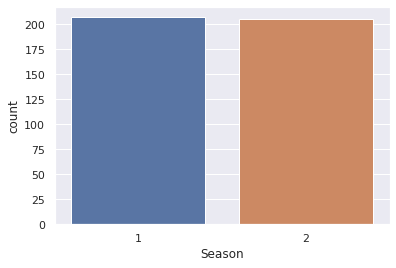

In [ ]:
sns.countplot(train["Season"])

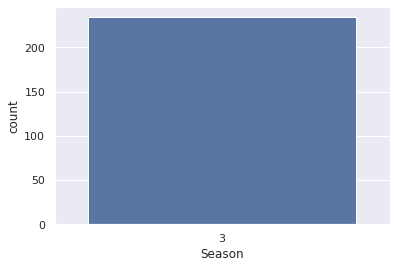

In [ ]:
sns.countplot(test["Season"])

- We can see that 2 seasons are provided in the training data while one season is provided in the the test

#### How many unique match IDs are provided?

- From a football perspective, can you find out what's a match, are matches specific to every season?
- What is also the difference between Match_ID and Game_ID?

In [ ]:
train[train['Match_ID']==166]

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
148,2018-04-24,2,166.0,ID_KLXJD2ZC,Coma Pinwheel,Milky Way,Draw
280,2017-08-14,1,166.0,ID_7YEZ3VK0,Circinus,Cartwheel,Away win
364,2017-01-08,1,166.0,ID_WH4S1N9Q,Milky Way,Comet,Draw


In [ ]:
test['Match_ID'].value_counts().sum()

234

In [ ]:
train['Match_ID'].value_counts().sum()

412

In [ ]:
train['Match_ID'].nunique()

224

In [ ]:
test['Match_ID'].nunique()

213

Some entries contain same Match_ID from either of the season

What is the significance of this Match_ID?

#### How many games were played in train seasons and test seasons?

In [ ]:
train['Game_ID'].value_counts().sum()

412

In [ ]:
test['Game_ID'].value_counts().sum()

234

In [ ]:
train['Game_ID'].nunique()

412

In [ ]:
test['Game_ID'].nunique()

234

#### How many teams were away and home?

In [ ]:
train["Home Team"].nunique()

19

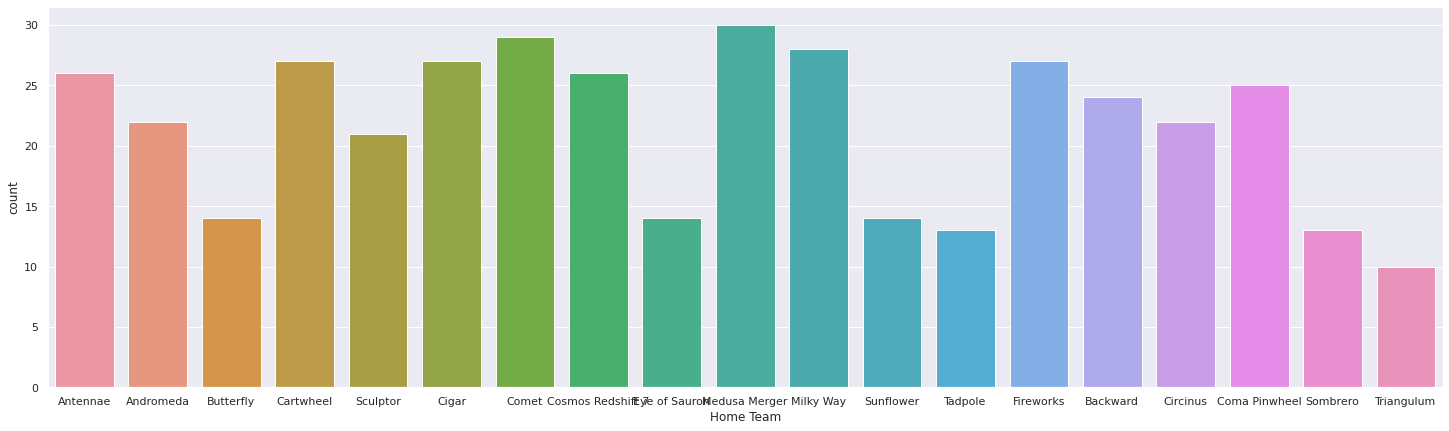

In [ ]:
pyplot.figure(figsize=(25,7))
sns.countplot(train["Home Team"])

In [ ]:
train["Away Team"].nunique()

19

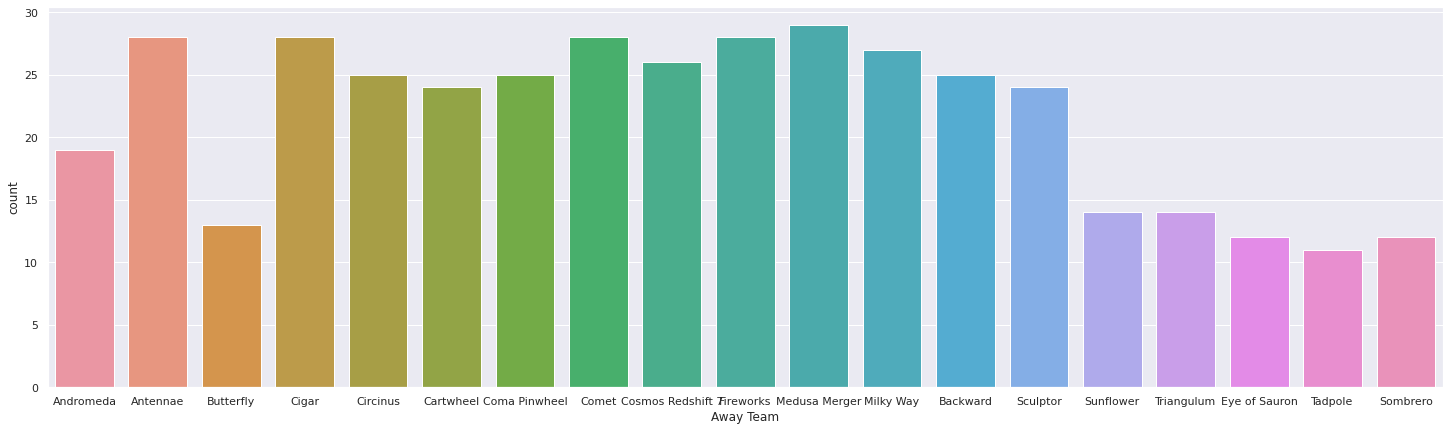

In [ ]:
pyplot.figure(figsize=(25,7))
sns.countplot(train["Away Team"])

In [ ]:
test["Home Team"].nunique()

16

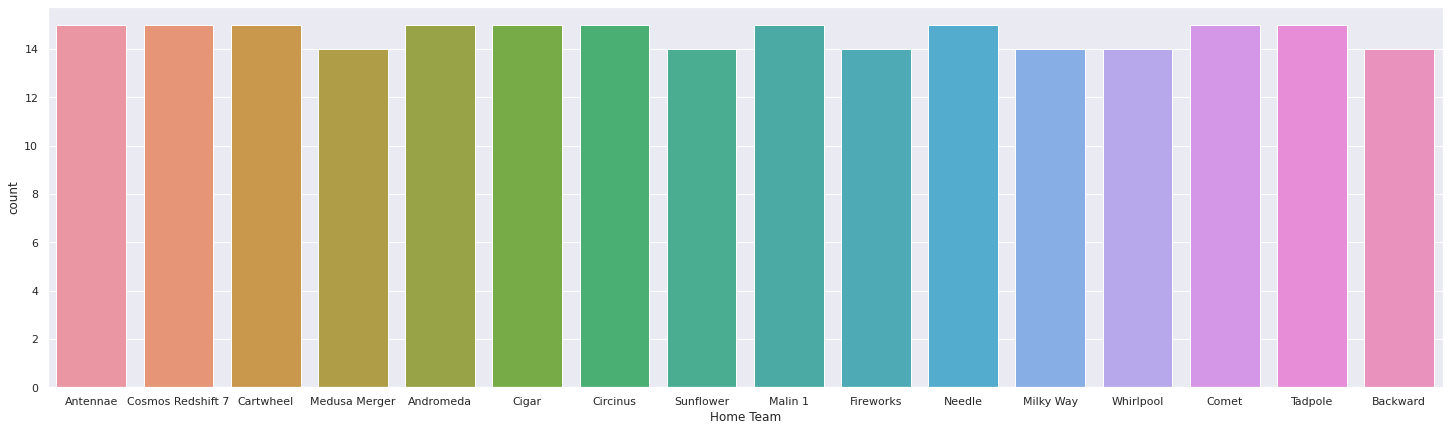

In [ ]:
pyplot.figure(figsize=(25,7))
sns.countplot(test["Home Team"])

In [ ]:
test["Away Team"].nunique()

16

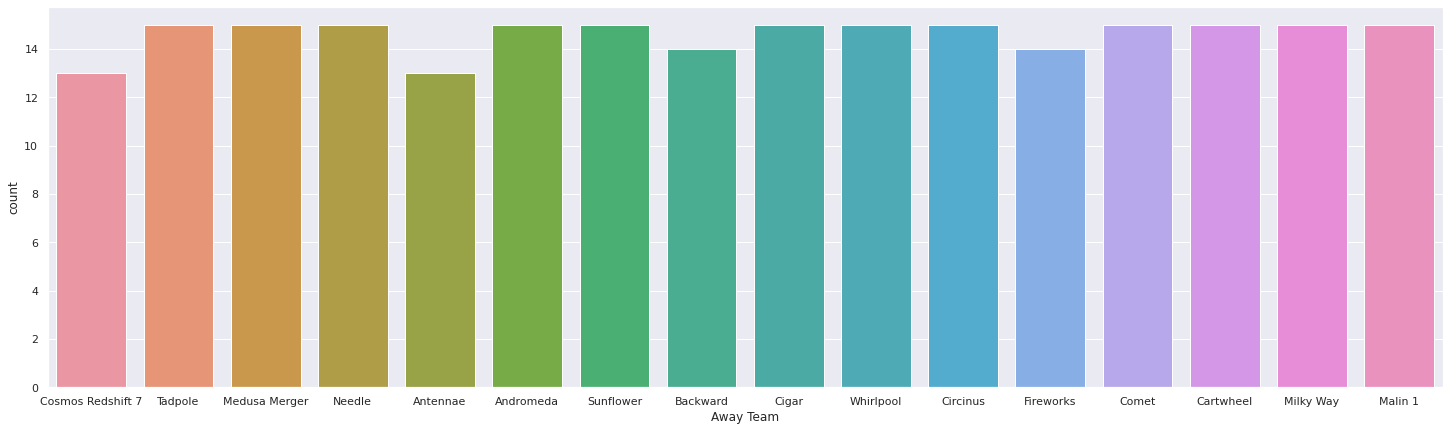

In [ ]:
pyplot.figure(figsize=(25,7))
sns.countplot(test["Away Team"])

- We can see that the number of teams in Home and away are equal in both cases, however the test count of the teams is more balance than the train, could this be as a result of 1 season in test and 2 seasons in the train? For the train can you countplot per season?

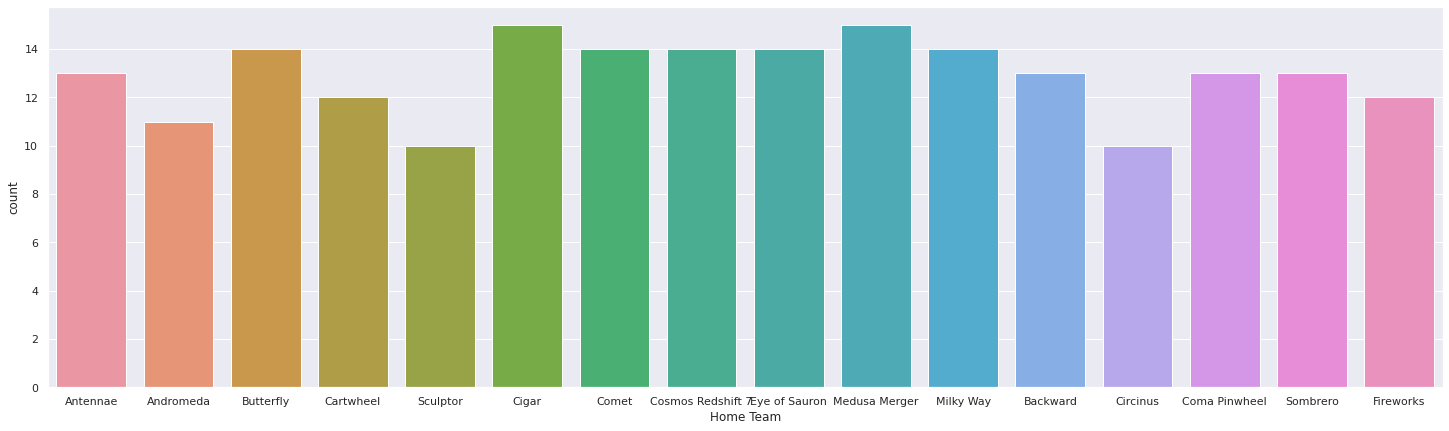

In [ ]:
#countplot for the Home Team at season 1
pyplot.figure(figsize=(25,7))
sns.countplot(train[train['Season']==1]['Home Team'])

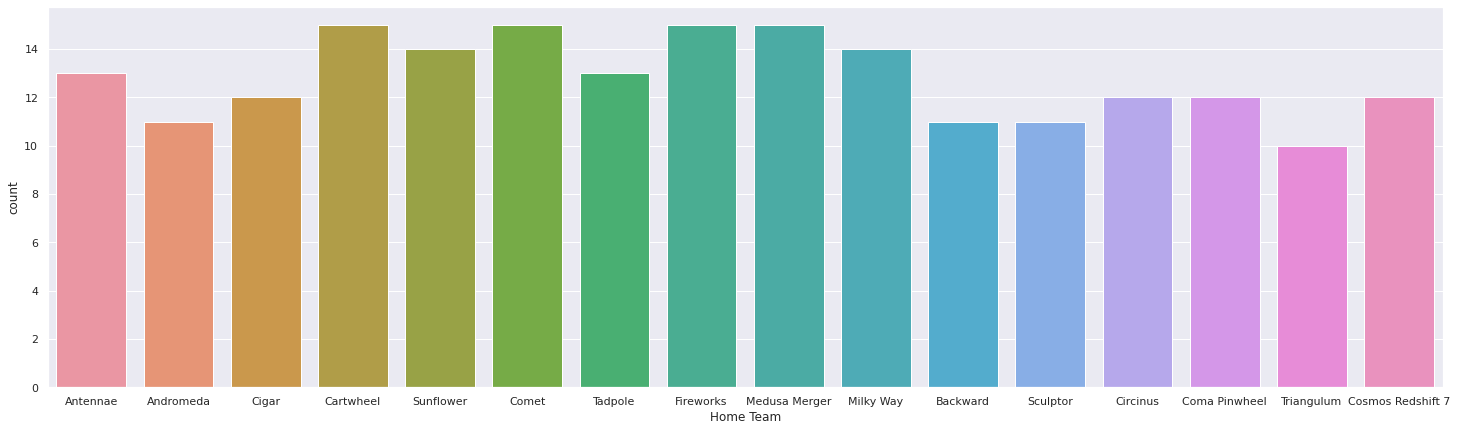

In [ ]:
#countplot for the Home Team at season 2
pyplot.figure(figsize=(25,7))
sns.countplot(train[train['Season']==2]['Home Team'])

The countplot for both season 1 and 2 is not balanced individually .Hence the unbalance result combinely.

Cartwheel played 12 matches in season 1 but 15 in the season 2

#### Did the team Win, Lose or Draw?

- Let's look at the target column, the reason for creating our machine leaning model, the goal of every footbal game is to determine the winner

In [ ]:
train["Score"].nunique()

3

There are three unique entries for the score

Home Win

Away Win

Draw

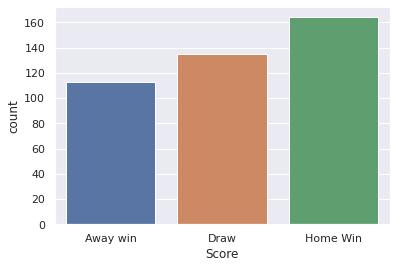

In [ ]:
sns.countplot(train["Score"])

This countplot makes sense as in most cases the home team always have a game environment advantage and always vibe for victory more

We have 3 classifications, did the away team win, did both teams draw or did the home team win? We can see that in most cases the home team won. There's much more you can do with this field:

    - Look at every team, the number of games played? did they win or lose, are most of their wins during home or away game?

In [ ]:
train.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [ ]:
train['Home Team'].unique()

array(['Antennae', 'Andromeda', 'Butterfly', 'Cartwheel', 'Sculptor',
       'Cigar', 'Comet', 'Cosmos Redshift 7', 'Eye of Sauron',
       'Medusa Merger', 'Milky Way', 'Sunflower', 'Tadpole', 'Fireworks',
       'Backward', 'Circinus', 'Coma Pinwheel', 'Sombrero', 'Triangulum'],
      dtype=object)

In [ ]:
#number of games they played
team_cols = ['Antennae', 'Andromeda', 'Butterfly', 'Cartwheel', 'Sculptor',
       'Cigar', 'Comet', 'Cosmos Redshift 7', 'Eye of Sauron',
       'Medusa Merger', 'Milky Way', 'Sunflower', 'Tadpole', 'Fireworks',
       'Backward', 'Circinus', 'Coma Pinwheel', 'Sombrero', 'Triangulum']
for team in team_cols:
 at_home = train[train['Home Team'] == team]['Game_ID'].value_counts().sum()
 at_away = train[train['Away Team']== team]['Game_ID'].value_counts().sum()
 Total_games_played = at_home + at_away
 print('Total Number of games played in home = ',at_home,'in away = ',at_away,'season 1 & 2 by',team, '=',Total_games_played) 

Total Number of games played in home =  26 in away =  28 season 1 & 2 by Antennae = 54
Total Number of games played in home =  22 in away =  19 season 1 & 2 by Andromeda = 41
Total Number of games played in home =  14 in away =  13 season 1 & 2 by Butterfly = 27
Total Number of games played in home =  27 in away =  24 season 1 & 2 by Cartwheel = 51
Total Number of games played in home =  21 in away =  24 season 1 & 2 by Sculptor = 45
Total Number of games played in home =  27 in away =  28 season 1 & 2 by Cigar = 55
Total Number of games played in home =  29 in away =  28 season 1 & 2 by Comet = 57
Total Number of games played in home =  26 in away =  26 season 1 & 2 by Cosmos Redshift 7 = 52
Total Number of games played in home =  14 in away =  12 season 1 & 2 by Eye of Sauron = 26
Total Number of games played in home =  30 in away =  29 season 1 & 2 by Medusa Merger = 59
Total Number of games played in home =  28 in away =  27 season 1 & 2 by Milky Way = 55
Total Number of games play

* Total number of games played by each team varies.
* Most teams had more home matches than away matches.

* It seems the data set records all matches played by each team in the three seasons irrespecive of the championship,leagues and cups they played in.

What could cause this?

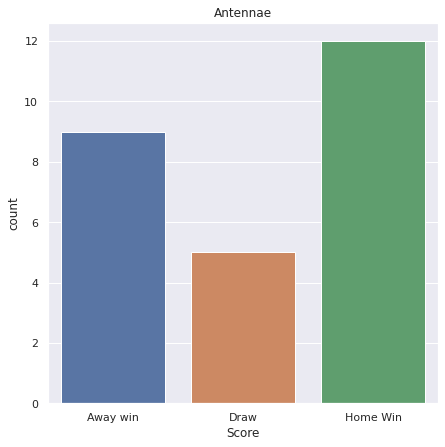

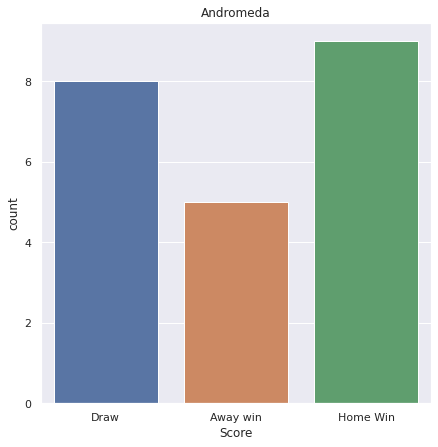

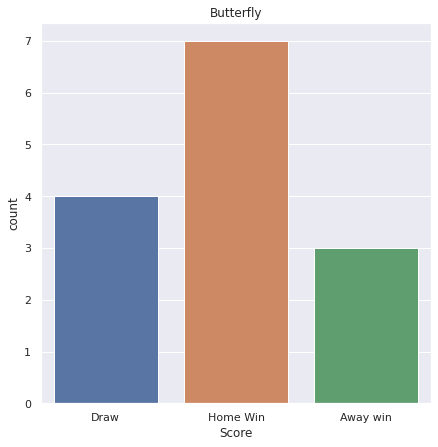

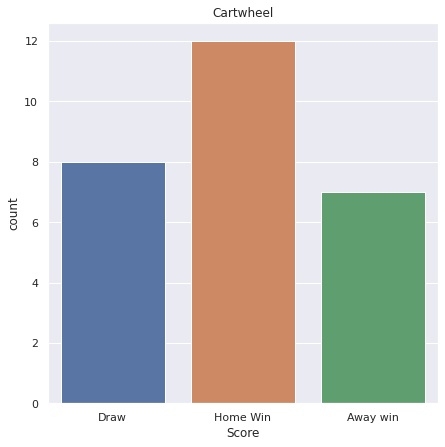

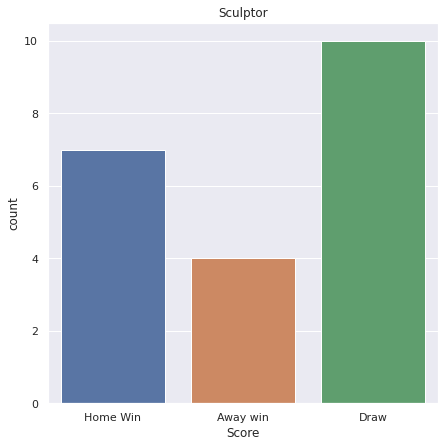

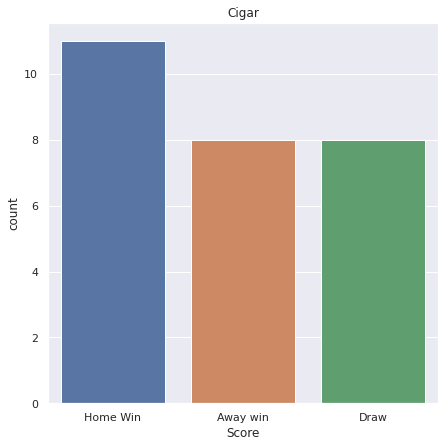

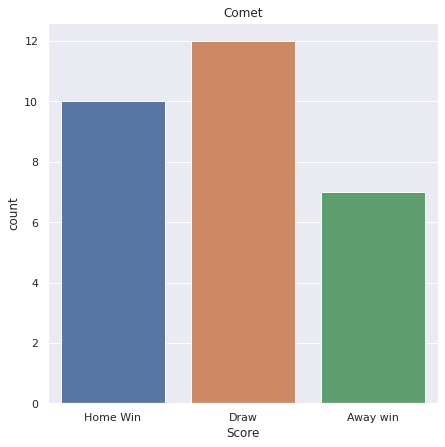

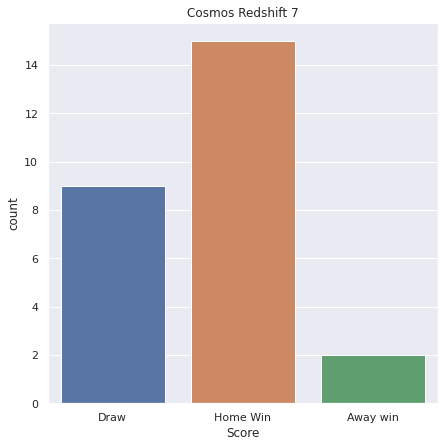

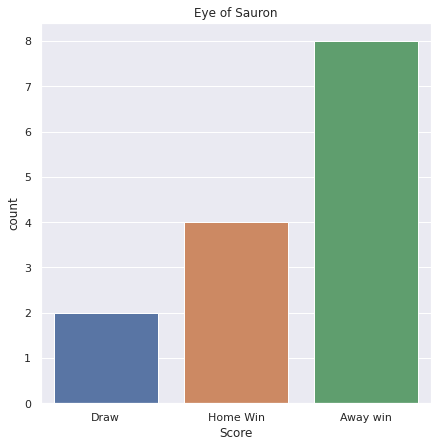

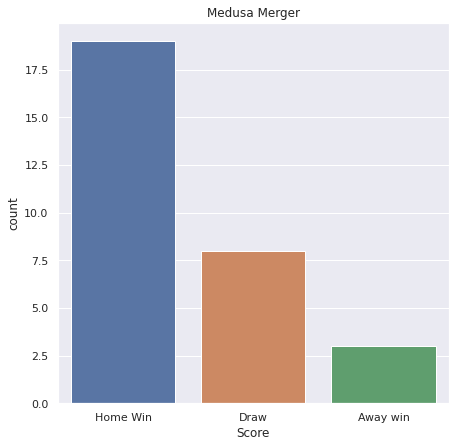

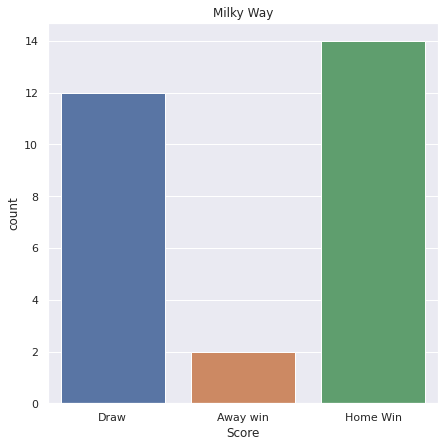

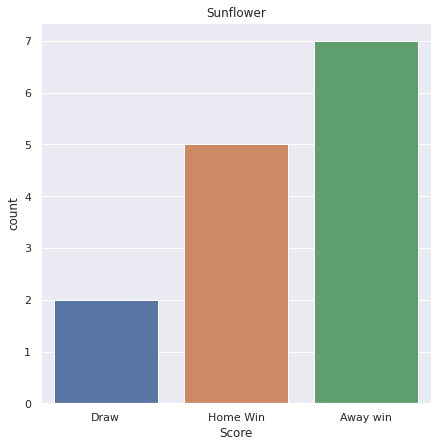

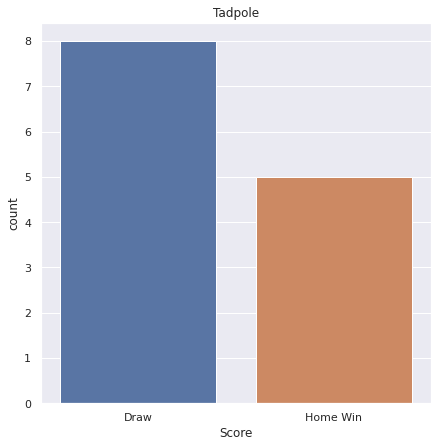

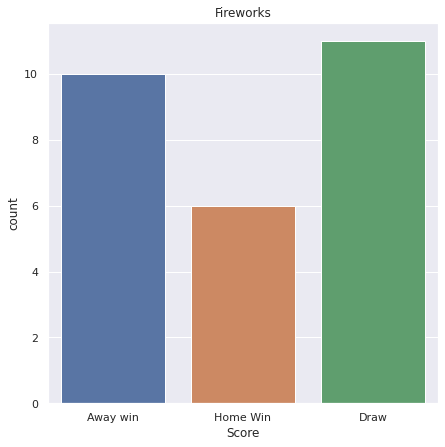

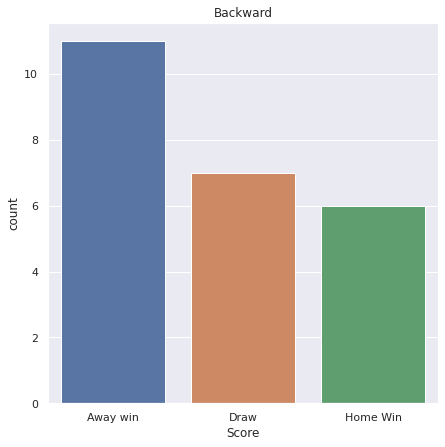

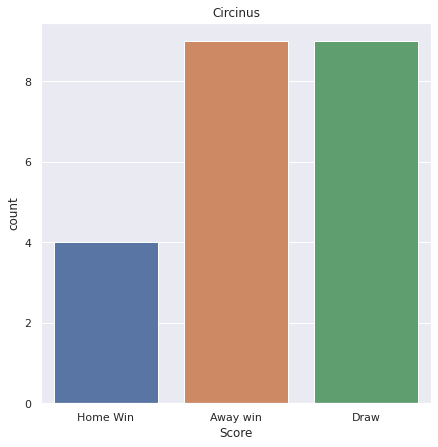

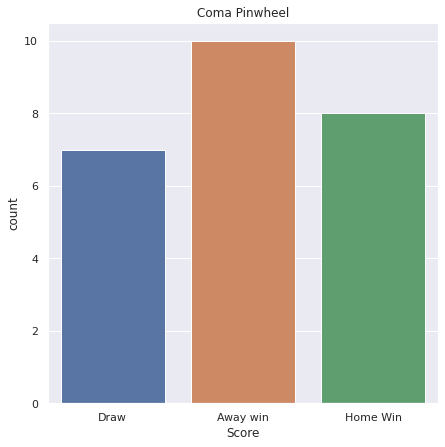

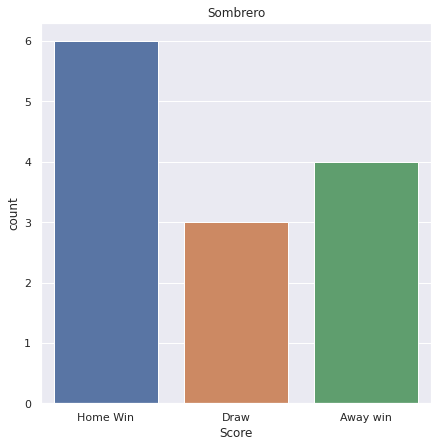

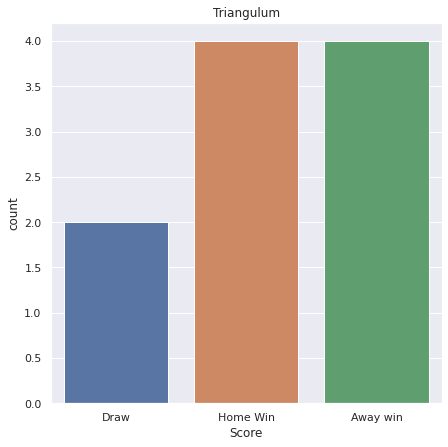

In [ ]:
#are most of there wins in home or away?
#Visualize home wins when the team are at home
for team in team_cols:
  pyplot.figure(figsize=(7,7))
  sns.countplot(train[train['Home Team']==team]['Score']).set(title = team)

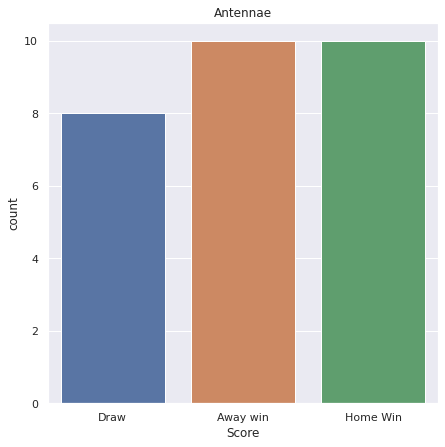

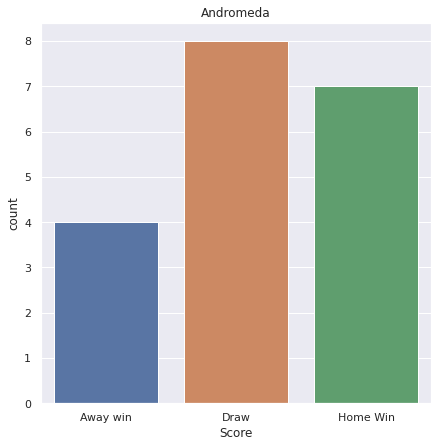

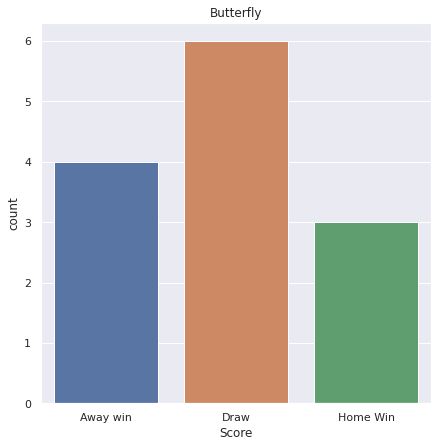

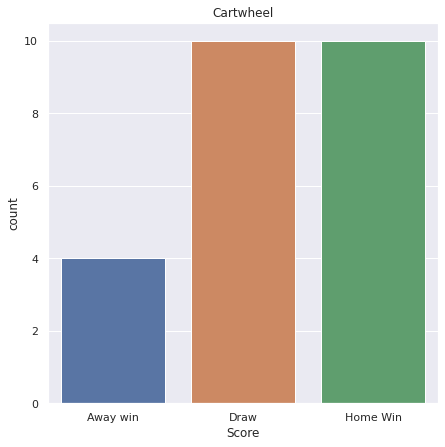

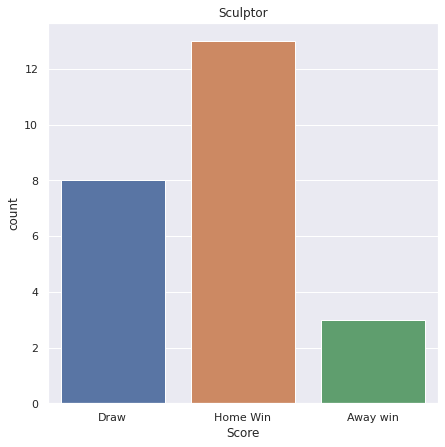

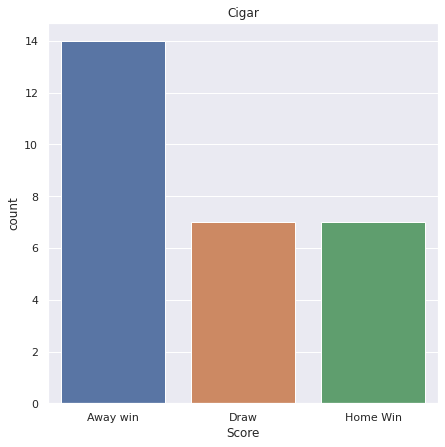

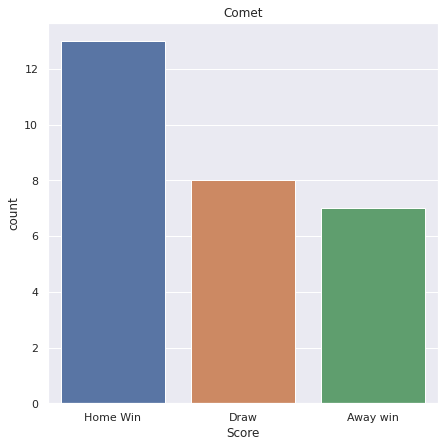

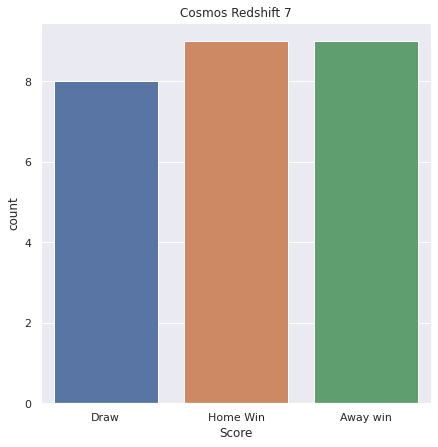

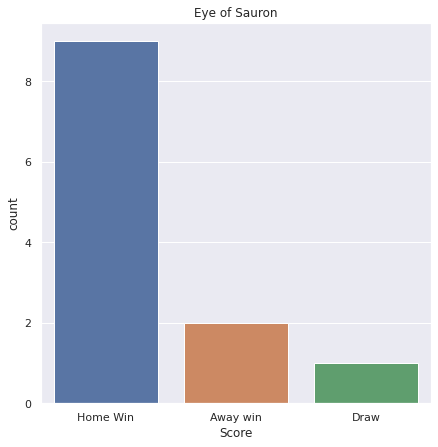

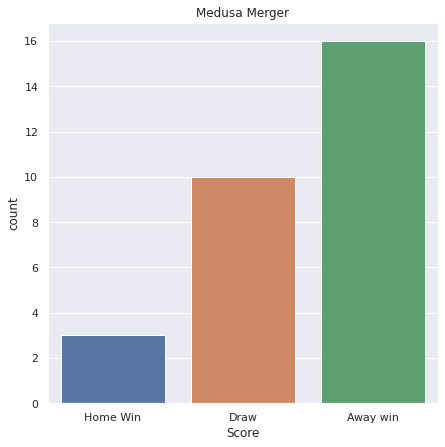

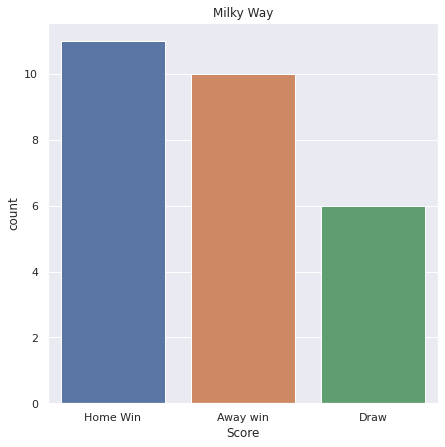

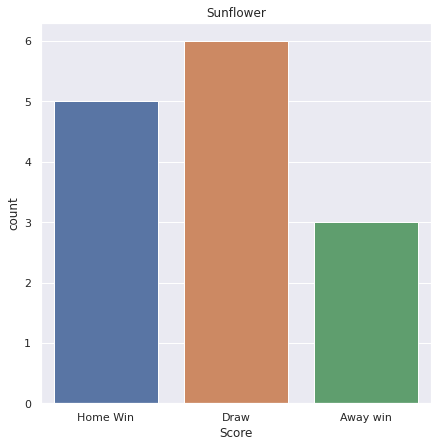

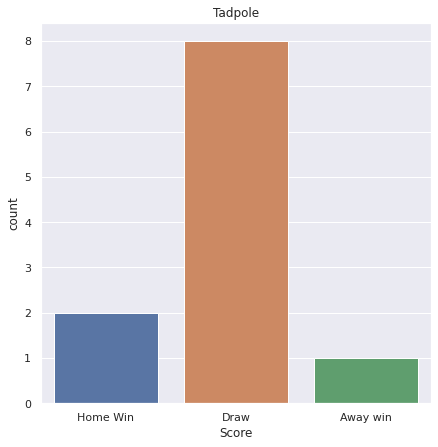

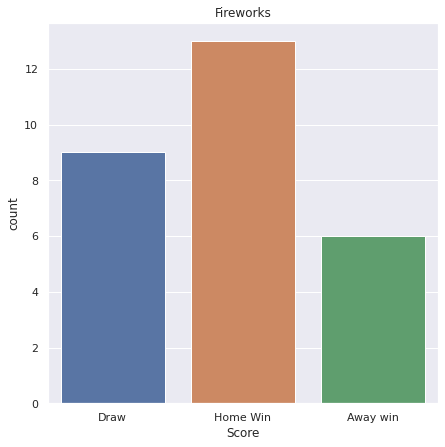

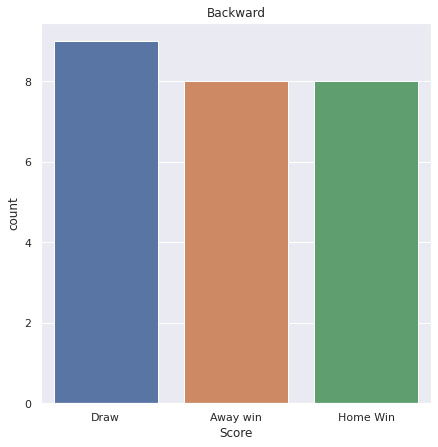

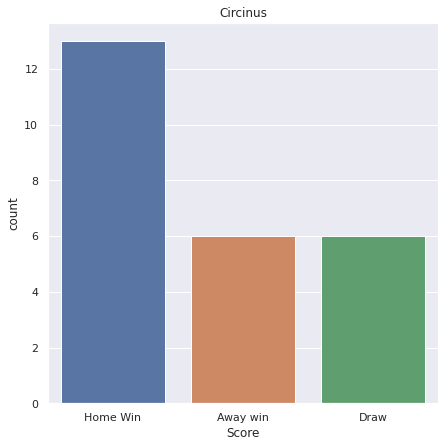

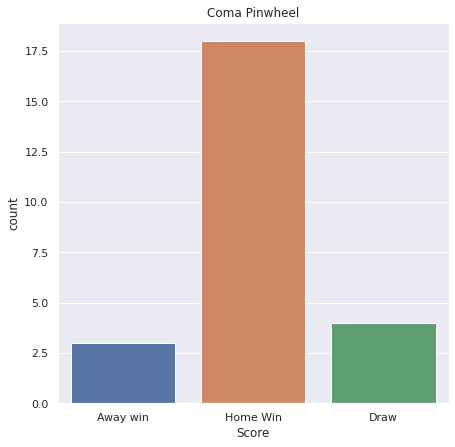

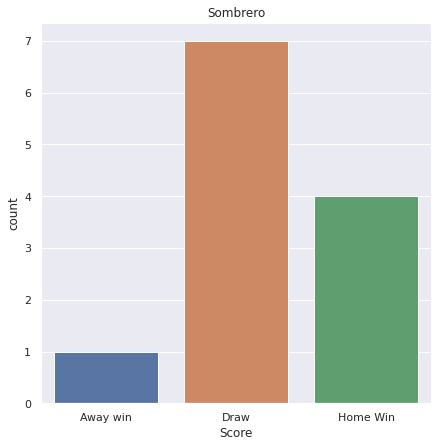

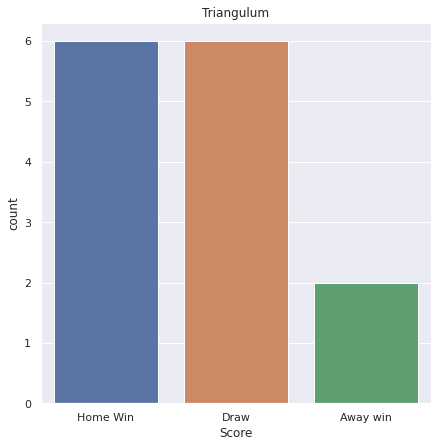

In [ ]:
#visualize away wins when the teams are on away
for team in team_cols:
  pyplot.figure(figsize=(7,7))
  sns.countplot(train[train['Away Team']==team]['Score']).set(title = team)

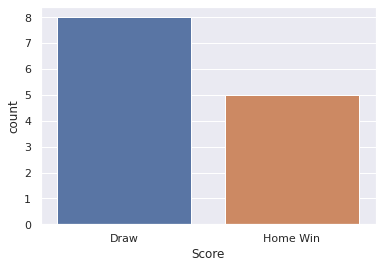

In [ ]:
#there is something about this tadpole
sns.countplot(train[train['Home Team']=='Tadpole']['Score'])

For all the martches *Tadpole* played as the home team no team ever won against them.
Is this true?

* 15 teams have there Home wins much higher than there away wins.
* Teams having Home or Away Wins higher than 10 played matches above 50 

### Feature Engineering and Modelling

#### Game statistics 

- This file shows how the game was played from start to end, the actions of the game, which player was it passed to etc.
- We will need to merge this with the train and test data provided.

In [5]:
#Tag the training set and the testing set
train["tag"] = 'train'
test["tag"]= 'test'

#merge the two sets together
train_test = pd.concat([train, test])

In [ ]:
train_test.shape

(646, 8)

In [ ]:
train_test.head(3)

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score,tag
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,train
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw,train
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win,train


In [ ]:
train_test.tail(3)

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score,tag
231,2018-12-22,3,300.0,ID_2ZK5TE39,Circinus,Malin 1,NaN,test
232,2019-05-07,3,300.0,ID_IS54QGW9,Needle,Andromeda,NaN,test
233,2019-05-14,3,300.0,ID_YG9IONLS,Tadpole,Circinus,NaN,test


In [ ]:
#keeping track of Game_ID uniqueness
train_test['Game_ID'].nunique()

646

In [6]:
#view the game statistics data frame
#combining the two sets(training game statistics and testing game statistics)
game_stat = pd.concat([train_game_stat, test_game_stat])

In [ ]:
game_stat.head(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
game_stat.tail(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
780231,ID_03VRW8WV,Player_6DVBNW9L,3663.0,7.5,19.6,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,NaN,NaN,0.0,0.0,0.0,96.42,96.75,Player_6DVBNW9L,NaN,7.5,19.6,2042.0,Comet,2042.0,0.0
780232,ID_03VRW8WV,Player_6DVBNW9L,3664.0,7.5,19.6,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,NaN,NaN,0.0,0.0,0.0,96.42,96.75,Player_77KCLG39,NaN,23.0,0.0,2042.0,Comet,2043.0,0.0
780233,ID_03VRW8WV,Player_77KCLG39,3665.0,23.0,0.0,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,NaN,NaN,1.0,0.0,1.0,96.62,96.95,NaN,NaN,NaN,NaN,2043.0,NaN,NaN,0.0


In [ ]:
game_stat[game_stat['xt_value']!=0.0].tail(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
780196,ID_03VRW8WV,Player_1WUDC4OR,3628.0,11.9,51.9,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,NaN,NaN,1.0,0.0,1.0,95.42,95.75,Player_UXS0YUMR,NaN,6.2,61.1,2023.0,Comet,2024.0,-0.002403
780197,ID_03VRW8WV,Player_UXS0YUMR,3629.0,6.2,61.1,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,NaN,NaN,1.0,0.0,1.0,95.45,95.78,Player_1WUDC4OR,NaN,39.0,51.5,2024.0,Comet,2025.0,0.005764
780210,ID_03VRW8WV,Player_4IPAQY84,3642.0,17.7,45.2,Comet,NaN,2nd half,3,Hideaki,Antennae,0.0,0.0,NaN,NaN,1.0,0.0,1.0,95.85,96.18,Player_GPMIER48,NaN,72.7,18.3,2032.0,Antennae,2033.0,0.014109


In [7]:
all_data = game_stat.merge(train_test, on="Game_ID")

In [ ]:
all_data.shape

(2351811, 35)

In [ ]:
all_data.head(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value,Date,Season_y,Match_ID,Home Team,Away Team,Score,tag
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,train
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,train
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,train


#### How to deal with column that are categorical?

- There are various ways of doing this:-

    - One hot encoding 
    - label encoding etc
    
    
- In this starter nb, I'll use label encoding, you can try other other ways

In [8]:
#Encoding Game_ID and Playr_ID and mapping.
LE = LabelEncoder()

all_data["Game_ID"] = LE.fit_transform(all_data["Game_ID"])
game_mapping = dict(zip(LE.classes_, range(len(LE.classes_))))
all_data["Player_ID"] = LE.fit_transform(all_data["Player_ID"])

In [9]:
game_mapping

{'ID_00EFNL7L': 0,
 'ID_00J124MI': 1,
 'ID_03VRW8WV': 2,
 'ID_04T9W310': 3,
 'ID_05YW7A1R': 4,
 'ID_064HV3UA': 5,
 'ID_06QXUEYD': 6,
 'ID_06SV1XSM': 7,
 'ID_08N8KYTM': 8,
 'ID_0A2WEVY3': 9,
 'ID_0BFR12C0': 10,
 'ID_0D97CTM2': 11,
 'ID_0DQCXCXH': 12,
 'ID_0H4KVTOZ': 13,
 'ID_0M5K2L1J': 14,
 'ID_0O3OGCB9': 15,
 'ID_0OPXV0TY': 16,
 'ID_0OR30CC4': 17,
 'ID_0OW7LBXH': 18,
 'ID_0PBGEMAI': 19,
 'ID_0SXG1LVI': 20,
 'ID_0TIEZ7MG': 21,
 'ID_0UB8ADG9': 22,
 'ID_12945FWD': 23,
 'ID_133YXY0T': 24,
 'ID_172V2IXW': 25,
 'ID_1B6FP9H5': 26,
 'ID_1D1X4PFB': 27,
 'ID_1ED799VW': 28,
 'ID_1FEH4NFI': 29,
 'ID_1IQNQPAW': 30,
 'ID_1J98M9UL': 31,
 'ID_1JGSZL4I': 32,
 'ID_1KCBWUKE': 33,
 'ID_1KKTGS75': 34,
 'ID_1LEM1AAP': 35,
 'ID_1TGCIK70': 36,
 'ID_1Y735BT9': 37,
 'ID_1YF71544': 38,
 'ID_1ZPA9XMX': 39,
 'ID_20BPYE4G': 40,
 'ID_21BTFEL5': 41,
 'ID_21SVBXLQ': 42,
 'ID_22R4A4OV': 43,
 'ID_24FZH22W': 44,
 'ID_24HKPKQH': 45,
 'ID_25GTI42K': 46,
 'ID_27YV4RRO': 47,
 'ID_2947LQTO': 48,
 'ID_2B96PJLU': 49,
 'ID_2BHM1

- For the teams ensure they are transformed the same, you do not want a scenario where team Circinus is mapped as 1 on one column and mapped as 2 on another column, this will be inconsistent and will affect the model results

In [10]:
all_data["Team"] = LE.fit_transform(all_data["Team"])

mapping = dict(zip(LE.classes_, range(len(LE.classes_))))

In [11]:
mapping

{'Andromeda': 0,
 'Antennae': 1,
 'Backward': 2,
 'Butterfly': 3,
 'Cartwheel': 4,
 'Cigar': 5,
 'Circinus': 6,
 'Coma Pinwheel': 7,
 'Comet': 8,
 'Cosmos Redshift 7': 9,
 'Eye of Sauron': 10,
 'Fireworks': 11,
 'Malin 1': 12,
 'Medusa Merger': 13,
 'Milky Way': 14,
 'Needle': 15,
 'Sculptor': 16,
 'Sombrero': 17,
 'Sunflower': 18,
 'Tadpole': 19,
 'Triangulum': 20,
 'Whirlpool': 21}

In [12]:
#applying mapping for Opposition_Team, Home_Team and Away_Team
all_data["Opposition_Team"] = all_data["Opposition_Team"].apply(lambda x: mapping[x])
all_data["Home Team"] = all_data["Home Team"].apply(lambda x: mapping[x])
all_data["Away Team"] = all_data["Away Team"].apply(lambda x: mapping[x])

In [13]:
#applying encoding to other categorical such as Action,Half and Manager
all_data["Action"] = LE.fit_transform(all_data["Action"])
all_data["Half"] = LE.fit_transform(all_data["Half"])
all_data["Manager"] = LE.fit_transform(all_data["Manager"])

In [14]:
all_data.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Season_x', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
       'Goals_scored', 'Goals_conceded', 'Accurate passes',
       'Inaccurate passes', 'Passes', 'Start_minutes', 'End_minutes',
       'next_player', 'next_action', 'next_x', 'next_y', 'event_id',
       'next_team', 'next_event_id', 'xt_value', 'Date', 'Season_y',
       'Match_ID', 'Home Team', 'Away Team', 'Score', 'tag'],
      dtype='object')

- For this nb, I'll drop most of the columns that have alot on NAN values, you can choose to fill those NAN values since the columns might be worth including in the modeling

- I'll drop also the column in train game statistics not present in the test game stats; you can use these columns for more analysis and feature engineering.

In [15]:
all_data.isnull().any()

Game_ID              False
Player_ID            False
id                   False
X                    False
Y                    False
Team                 False
Action               False
Half                 False
Season_x             False
Manager              False
Opposition_Team      False
Shots                 True
SoT                   True
Goals_scored          True
Goals_conceded        True
Accurate passes       True
Inaccurate passes     True
Passes                True
Start_minutes         True
End_minutes          False
next_player           True
next_action           True
next_x                True
next_y                True
event_id              True
next_team             True
next_event_id         True
xt_value              True
Date                 False
Season_y             False
Match_ID             False
Home Team            False
Away Team            False
Score                 True
tag                  False
dtype: bool

In [16]:
data1 = all_data.drop(["next_player", "next_action", "next_x", "next_y", "event_id", "next_team",
               "next_event_id", "xt_value", "Goals_scored", "Goals_conceded", ], axis=1)

In [17]:
cl_data  = all_data[["next_player", "next_action", "next_x", "next_y", "event_id", "next_team",
               "next_event_id", "xt_value", "Goals_scored", "Goals_conceded", ]]

In [18]:
data1.head(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Date,Season_y,Match_ID,Home Team,Away Team,Score,tag
0,645,534,1.0,52.5,34.0,6,2,0,2,52,2,0.0,0.0,1.0,0.0,1.0,0.03,0.37,2017-12-06,2,39.0,2,6,Home Win,train
1,645,534,2.0,52.5,34.0,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.03,0.37,2017-12-06,2,39.0,2,6,Home Win,train
2,645,429,3.0,37.0,32.7,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.05,0.38,2017-12-06,2,39.0,2,6,Home Win,train


In [19]:
cl_data.head(2)

,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value,Goals_scored,Goals_conceded
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [20]:
cl_data.isnull().any()

next_player       True
next_action       True
next_x            True
next_y            True
event_id          True
next_team         True
next_event_id     True
xt_value          True
Goals_scored      True
Goals_conceded    True
dtype: bool

In [21]:
#creating date features
#extracting year
data1['year'] = data1.Date.dt.year

#extracting month
data1['month'] = data1.Date.dt.month

#extracting day
data1['day'] = data1.Date.dt.day

#encoding all of the extracted features
data1['year'] = LE.fit_transform(data1['year'])
data1['month'] = LE.fit_transform(data1['month'])
data1['day'] = LE.fit_transform(data1['day'])

#encoding Action features
data1['Action'] = LE.fit_transform(data1['Action'])

In [ ]:
data1.head(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Date,Season_y,Match_ID,Home Team,Away Team,Score,tag,year,month,day
0,645,534,1.0,52.5,34.0,6,2,0,2,52,2,0.0,0.0,1.0,0.0,1.0,0.03,0.37,2017-12-06,2,39.0,2,6,Home Win,train,1,10,5
1,645,534,2.0,52.5,34.0,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.03,0.37,2017-12-06,2,39.0,2,6,Home Win,train,1,10,5
2,645,429,3.0,37.0,32.7,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.05,0.38,2017-12-06,2,39.0,2,6,Home Win,train,1,10,5


In [22]:
data2 = data1.drop('Date',axis=1)

In [ ]:
data2.head(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,Score,tag,year,month,day
0,645,534,1.0,52.5,34.0,6,2,0,2,52,2,0.0,0.0,1.0,0.0,1.0,0.03,0.37,2,39.0,2,6,Home Win,train,1,10,5
1,645,534,2.0,52.5,34.0,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.03,0.37,2,39.0,2,6,Home Win,train,1,10,5
2,645,429,3.0,37.0,32.7,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.05,0.38,2,39.0,2,6,Home Win,train,1,10,5


In [23]:
data2.isnull().sum()

Game_ID                   0
Player_ID                 0
id                        0
X                         0
Y                         0
Team                      0
Action                    0
Half                      0
Season_x                  0
Manager                   0
Opposition_Team           0
Shots                    92
SoT                      92
Accurate passes          92
Inaccurate passes        92
Passes                   92
Start_minutes            10
End_minutes               0
Season_y                  0
Match_ID                  0
Home Team                 0
Away Team                 0
Score                780234
tag                       0
year                      0
month                     0
day                       0
dtype: int64

In [24]:
#splitting the data back to training and testing set
train = data2[data2["tag"] == 'train']
test = data2[data2["tag"] == 'test']

#dropping the tag column
train = train.drop("tag", axis=1)
test = test.drop(["tag", "Score"], axis=1)
test = test.reset_index(drop=True)

In [25]:
#check there shape (training set and testing set)
train.shape, test.shape

((1571577, 26), (780234, 25))

In [ ]:
train.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,Score,year,month,day
0,645,534,1.0,52.5,34.0,6,2,0,2,52,2,0.0,0.0,1.0,0.0,1.0,0.03,0.37,2,39.0,2,6,Home Win,1,10,5
1,645,534,2.0,52.5,34.0,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.03,0.37,2,39.0,2,6,Home Win,1,10,5


In [ ]:
test.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,year,month,day
0,640,106,1.0,52.5,34.0,14,50,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14,3,2,18
1,640,106,2.0,52.5,34.0,14,50,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14,3,2,18


In [26]:
# to avoid nans, will map score only in the training set
train["Score"] = LE.fit_transform(train["Score"])
score_mapping = dict(zip(LE.classes_, range(len(LE.classes_))))

In [27]:
score_mapping

{'Away win': 0, 'Draw': 1, 'Home Win': 2}

In [28]:
train.columns , test.columns

(Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
        'Season_x', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
        'Accurate passes', 'Inaccurate passes', 'Passes', 'Start_minutes',
        'End_minutes', 'Season_y', 'Match_ID', 'Home Team', 'Away Team',
        'Score', 'year', 'month', 'day'],
       dtype='object'),
 Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
        'Season_x', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
        'Accurate passes', 'Inaccurate passes', 'Passes', 'Start_minutes',
        'End_minutes', 'Season_y', 'Match_ID', 'Home Team', 'Away Team', 'year',
        'month', 'day'],
       dtype='object'))

In [ ]:
#filling each columns with there individual mean
#test['Shots']=test['Shots'].fillna(test['Shots'].mean())
#test['Accurate passes']=test['Accurate passes'].fillna(test['Accurate passes'].mean())
#test['Inaccurate passes']=test['Inaccurate passes'].fillna(test['Inaccurate passes'].mean())
#test['Passes']=test['Passes'].fillna(test['Passes'].mean())
#test['Start_minutes']=test['Start_minutes'].fillna(test['Start_minutes'].mean())
#test['SoT']=test['SoT'].fillna(test['SoT'].mean())

In [29]:
SI = SimpleImputer(strategy="most_frequent")
#filling the categorical variable with missing variable with the mode
cat_null = ['Shots','Accurate passes','Inaccurate passes','Passes','Start_minutes','SoT']
for col in cat_null:
  test[col] = SI.fit_transform(test[[col]])

In [30]:
train.duplicated().sum(), test.duplicated().sum()

(3743, 0)

In [31]:
#removing duplicates from train set
train = train.drop_duplicates() 

In [32]:
#rechecking for null data
print(train.isnull().any().sum() , test.isnull().any().sum())

0 0


In [ ]:
train.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,Score,year,month,day
0,645,534,1.0,52.5,34.0,6,2,0,2,52,2,0.0,0.0,1.0,0.0,1.0,0.03,0.37,2,39.0,2,6,2,1,10,5
1,645,534,2.0,52.5,34.0,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.03,0.37,2,39.0,2,6,2,1,10,5


In [ ]:
test.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,year,month,day
0,640,106,1.0,52.5,34.0,14,50,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14,3,2,18
1,640,106,2.0,52.5,34.0,14,50,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14,3,2,18


In [ ]:
#rechecking the columns
train.columns , test.columns , train.shape , test.shape

(Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
        'Season_x', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
        'Accurate passes', 'Inaccurate passes', 'Passes', 'Start_minutes',
        'End_minutes', 'Season_y', 'Match_ID', 'Home Team', 'Away Team',
        'Score', 'year', 'month', 'day'],
       dtype='object'),
 Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
        'Season_x', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
        'Accurate passes', 'Inaccurate passes', 'Passes', 'Start_minutes',
        'End_minutes', 'Season_y', 'Match_ID', 'Home Team', 'Away Team', 'year',
        'month', 'day'],
       dtype='object'),
 (1567834, 26),
 (780234, 25))

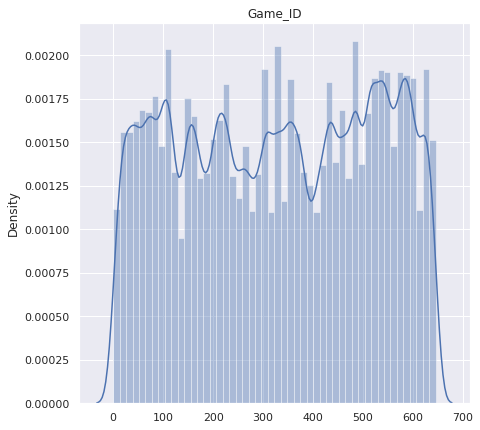

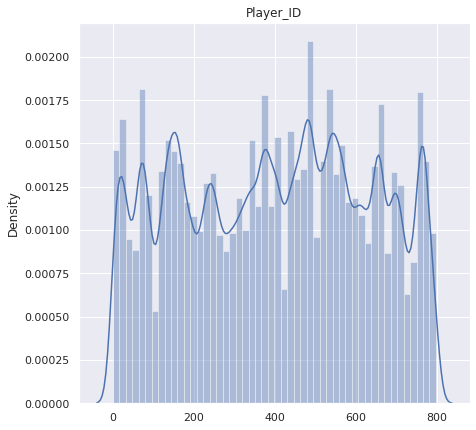

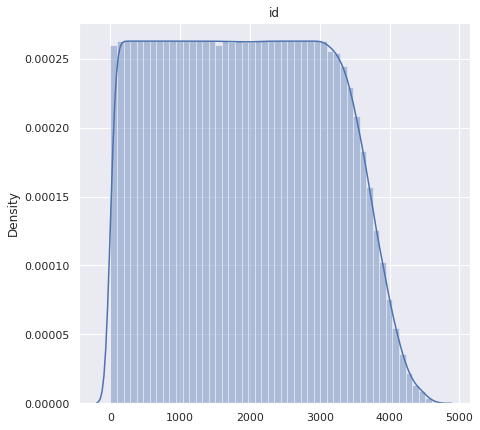

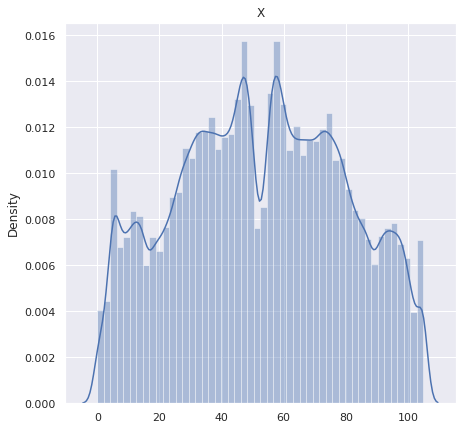

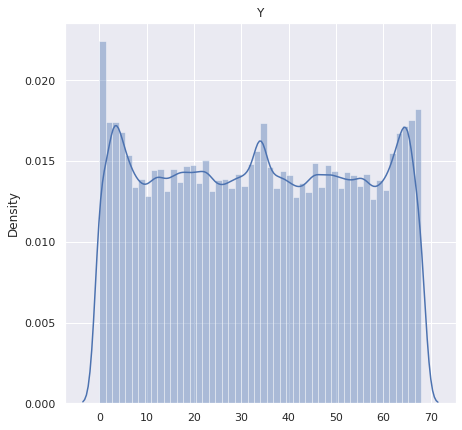

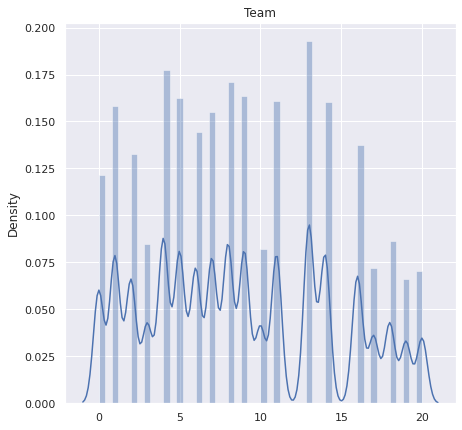

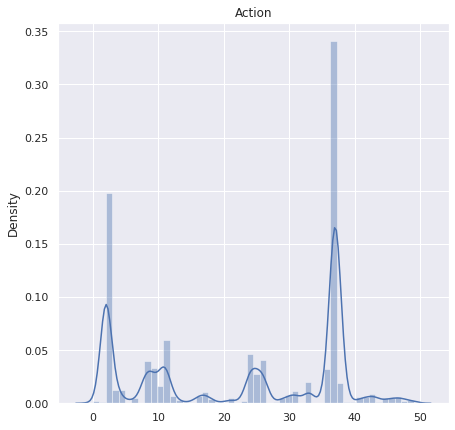

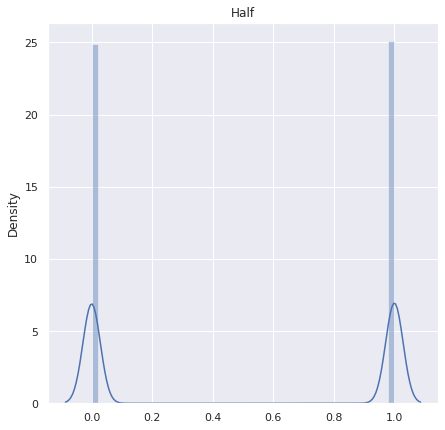

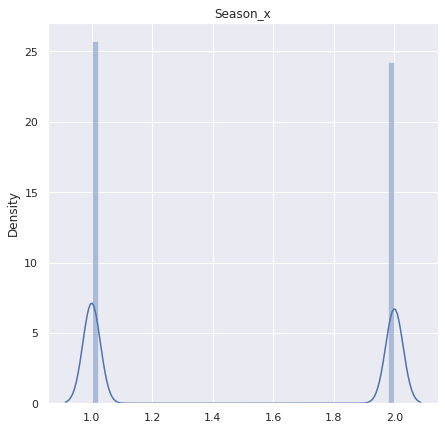

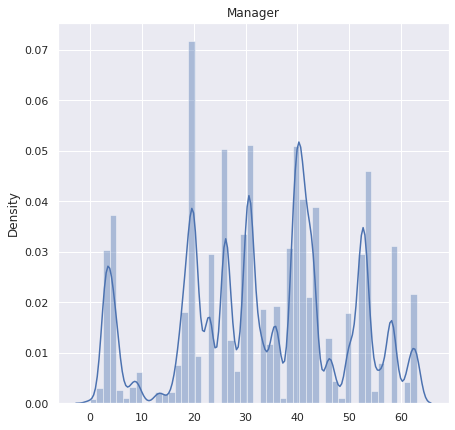

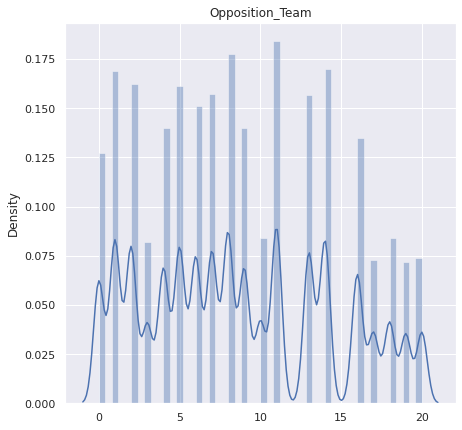

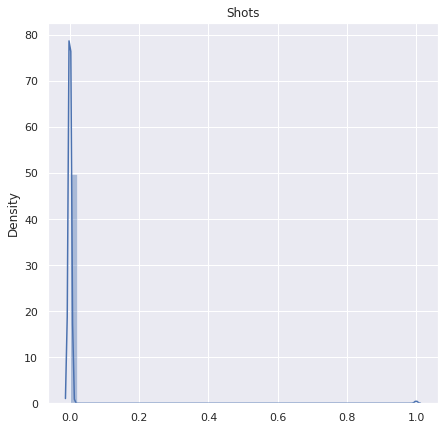

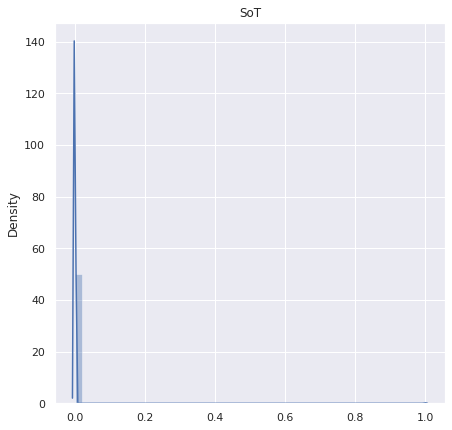

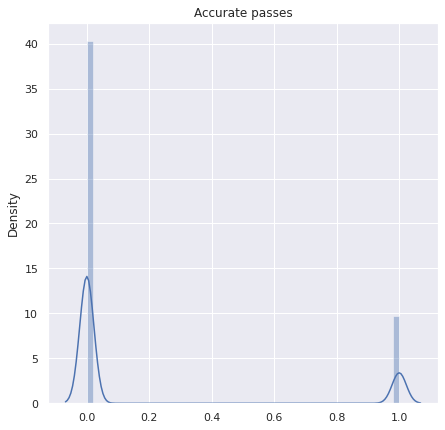

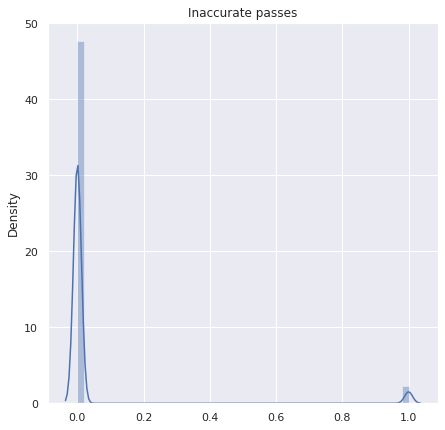

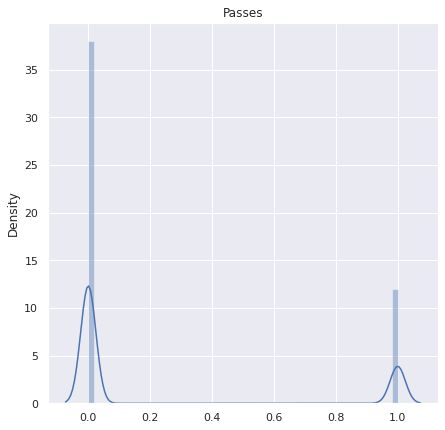

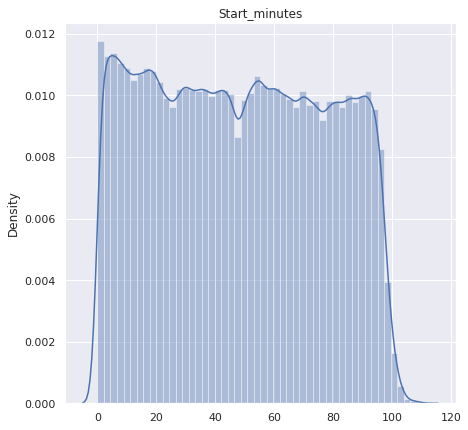

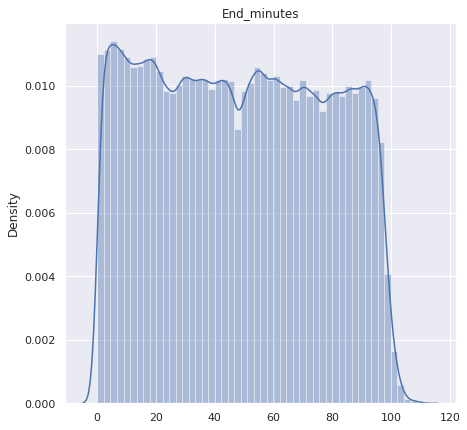

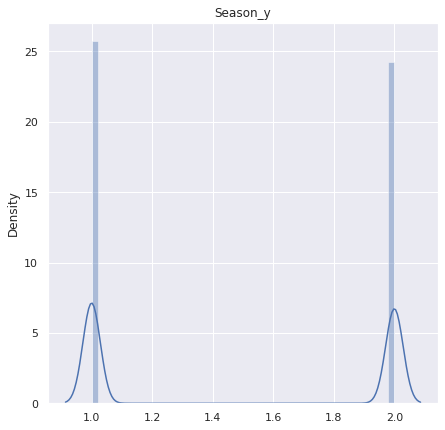

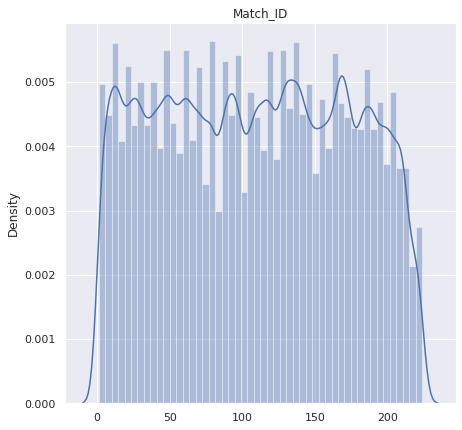

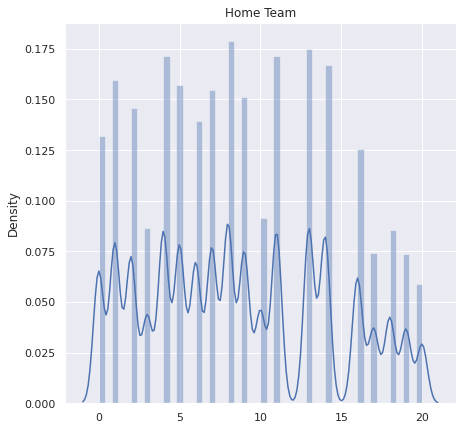

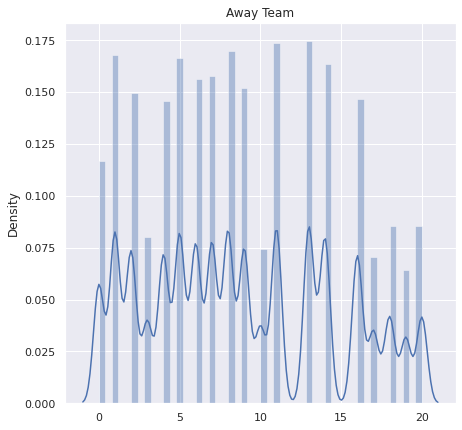

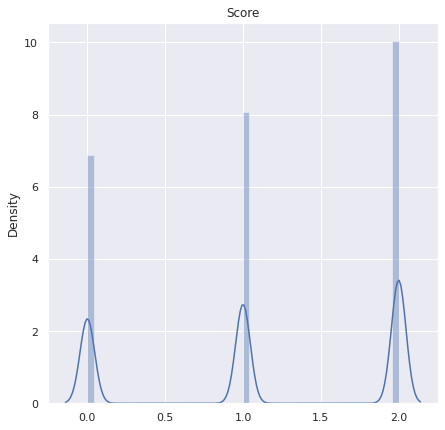

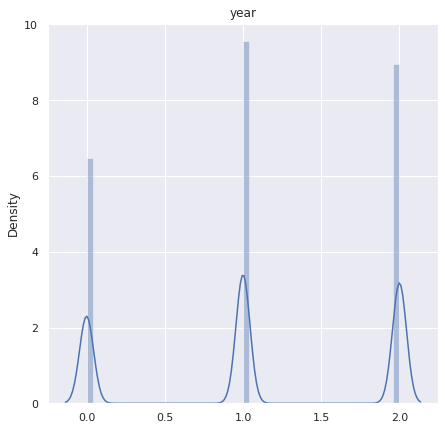

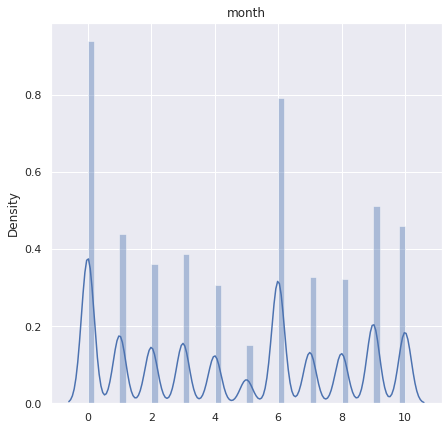

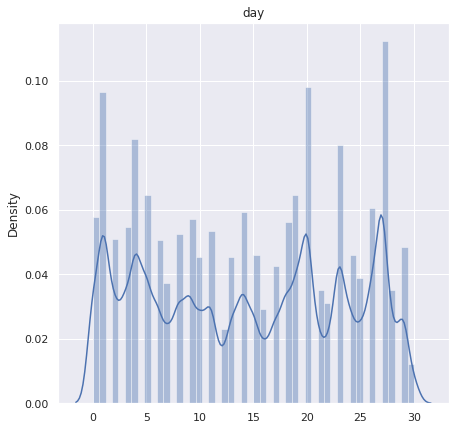

In [ ]:
#getting rid of outliers
train_cols = ['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
        'Season_x', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
        'Accurate passes', 'Inaccurate passes', 'Passes', 'Start_minutes',
        'End_minutes', 'Season_y', 'Match_ID', 'Home Team', 'Away Team',
        'Score', 'year', 'month', 'day']
test_cols = ['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
        'Season_x', 'Manager', 'Opposition_Team', 'Shots', 'SoT',
        'Accurate passes', 'Inaccurate passes', 'Passes', 'Start_minutes',
        'End_minutes', 'Season_y', 'Match_ID', 'Home Team', 'Away Team', 'year',
        'month', 'day']

#checking the distplot for train
for col in train_cols:
  pyplot.figure(figsize=(7,7))
  sns.distplot(x=train[col]).set_title(col)

It seems all features proves to be categorical, Hence there is no need of etting rid of outliers

In [33]:
#dealing with latitude and longitude
train[['X','Y']].head(2)

,X,Y
0,52.5,34.0
1,52.5,34.0


In [ ]:
test[['X','Y']].head(2)

,X,Y
0,52.5,34.0
1,52.5,34.0


Note:
X - LATITUDE
Y - LONGITUDE 

In [34]:
#train['center_X'] = (train['X'].values + train['X'].values) / 2
#train['center_Y'] = (train['Y'].values + train['lon'].values) / 2


#creating new features zone1 and zone2
train['zone1'] = train['X'] - train['Y']
train['zone2'] = train['X'] + train['Y']
test['zone1'] = test['X'] - test['Y']
test['zone2'] = test['X'] + test['Y']

In [ ]:
train.shape

(1567834, 28)

In [35]:
train['zone1'].nunique() , test['zone1'].nunique() , train['zone2'].nunique() , test['zone2'].nunique() 

(5661, 5561, 2901, 2912)

In [36]:
#generate bearing array
def bearing_array(lat, lng):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lat - lng)
    lat, lng = map(np.radians, (lat, lng))
    y = np.sin(lng_delta_rad) * np.cos(lat)
    x = np.cos(lat) * np.sin(lat) - np.sin(lng) * np.cos(lng) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
#for train
train['bearing'] = bearing_array(train['X'].values,train['Y'].values)
#for test
test['bearing'] = bearing_array(test['X'].values,test['Y'].values)

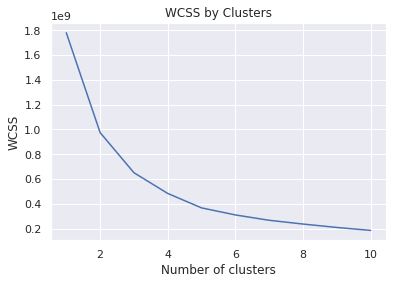

In [37]:
# To determine the number of clusters
# Create 10 models ranging 1 - 10 number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # fitting the datapoints
    kmeans.fit(train[['X','Y']].values)
    # Obtain the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
# Plotting the WCSS values on a line graph
pyplot.plot(range(1, 11), wcss)
pyplot.title('WCSS by Clusters')
pyplot.xlabel('Number of clusters')
pyplot.ylabel('WCSS')
pyplot.show()

Reasonably 2 is okay as number of cluster

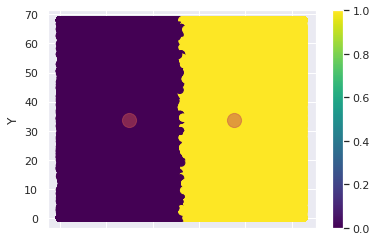

In [38]:
#for train
# Cluster Lat and Long 
kmeans = KMeans(n_clusters =2, init ='k-means++')
kmeans.fit(train[['X','Y']])
train['cluster_label'] = kmeans.fit_predict(train[['X','Y']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(train[['X','Y']])

# Full_data['cluster_label'].value_counts()
train.plot.scatter(x = 'X', y = 'Y', c=labels, s=50, cmap='viridis')
pyplot.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

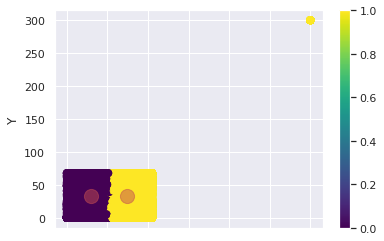

In [39]:
#for test
# Cluster Lat and Long 
kmeans = KMeans(n_clusters =2, init ='k-means++')
kmeans.fit(test[['X','Y']])
test['cluster_label'] = kmeans.fit_predict(test[['X','Y']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(test[['X','Y']])

# Full_data['cluster_label'].value_counts()
test.plot.scatter(x = 'X', y = 'Y', c=labels, s=50, cmap='viridis')
pyplot.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [40]:
train.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,Score,year,month,day,zone1,zone2,bearing,cluster_label
0,645,534,1.0,52.5,34.0,6,2,0,2,52,2,0.0,0.0,1.0,0.0,1.0,0.03,0.37,2,39.0,2,6,2,1,10,5,18.5,86.5,77.35743,1
1,645,534,2.0,52.5,34.0,6,37,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.03,0.37,2,39.0,2,6,2,1,10,5,18.5,86.5,77.35743,1


In [41]:
test.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,year,month,day,zone1,zone2,bearing,cluster_label
0,640,106,1.0,52.5,34.0,14,50,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14,3,2,18,18.5,86.5,77.35743,1
1,640,106,2.0,52.5,34.0,14,50,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14,3,2,18,18.5,86.5,77.35743,1


In [ ]:
#train['cluster_label_encoded'] = train.groupby('cluster_label')['Score'].transform('mean')
#test['cluster_label_encoded'] = test.groupby('cluster_label')['Score'].transform('mean')

### Modelling

- This is a classification problem that require using classification machine learning algorithms

In [42]:
corr_matrix = train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
to_drop

['Start_minutes', 'End_minutes', 'Season_y']

In [ ]:
X = train.drop(['Score','Start_minutes', 'End_minutes', 'Season_y'], axis=1)
y = train["Score"]




feature_importances_lgb = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model_1 = RandomForestClassifier(n_estimators=10000,
                      random_state=32,)
# Fit the model twice to avoid overfitting

for i in range(2):
    
    # Split into training and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i,shuffle=True)
    
    # Train using early stopping
    model_1.fit(X_train, y_train)
    
    # Record the feature importances
    feature_importances_lgb += model_1.feature_importances_

# Make sure to average feature importances! 
feature_importances_lgb = feature_importances_lgb / 2
feature_importances_lgb = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_lgb}).sort_values('importance', ascending = False)


In [ ]:
#check performance
y_pred = model_1.predict(X_test)
prediction = log_loss(y_test, y_pred)

In [ ]:
test = test.drop(['Start_minutes', 'End_minutes', 'Season_y'], axis =1)

In [ ]:
#cross validation
#kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

#for train_index, test_index in kf.split(X):
 #     print("Train:", train_index, "Validation:",test_index)
  #    X_train, X_test = X[train_index], X[test_index] 
   #   y_train, y_test = y[train_index], y[test_index]

In [ ]:
#skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
#for train_index, val_index in skf.split(X,y): 
 #   print("Train:", train_index, "Validation:", val_index) 
  #  X_train, X_test = X[train_index], X[val_index] 
   # y_train, y_test = y[train_index], y[val_index]


In [ ]:
RFmodel = RandomForestClassifier(random_state=32)
RFmodel.fit(X,y)
scores = cross_val_score(RFmodel, X, y, cv=5)
scores

In [ ]:
test = test[to_drop]

Feature: 0, Score: 0.16415
Feature: 1, Score: 0.00372
Feature: 2, Score: 0.00166
Feature: 3, Score: 0.00025
Feature: 4, Score: 0.00022
Feature: 5, Score: 0.05787
Feature: 6, Score: 0.00003
Feature: 7, Score: 0.00993
Feature: 8, Score: 0.06084
Feature: 9, Score: 0.06807
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00079
Feature: 16, Score: 0.00071
Feature: 17, Score: 0.00861
Feature: 18, Score: 0.14782
Feature: 19, Score: 0.10944
Feature: 20, Score: 0.12250
Feature: 21, Score: 0.02290
Feature: 22, Score: 0.08447
Feature: 23, Score: 0.13599


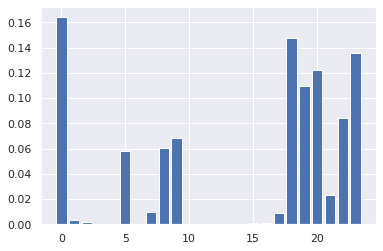

In [ ]:
RFCmodel = RandomForestClassifier(random_state=32)
RFCmodel.fit(X, y)
# get importance
importance = RFCmodel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
RFCmodel1 = RandomForestClassifier(random_state=32)
RFCmodel1.fit(X,y)

RandomForestClassifier(random_state=32)

In [ ]:
#test = test[use_cols]

In [ ]:
XGBCmodel = XGBClassifier(random_state=32)
XGBCmodel.fit(X,y)

XGBClassifier(objective='multi:softprob', random_state=32)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.38 accuracy with a standard deviation of 0.05


In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(RFmodel, X, y, cv=cv)

array([1., 1., 1., 1., 1.])

### Predict on the test set

In [ ]:
test_predictions  = RFmodel.predict(test)

In [ ]:
test["Score"] = test_predictions

In [ ]:
test["Score"].unique()

array(['Draw', 'Away win', 'Home Win'], dtype=object)

In [ ]:
score_mapping = {value:key for key, value in score_mapping.items()}
test["Score"] = test["Score"].apply(lambda x: score_mapping[x])

In [ ]:
game_mapping = {value:key for key, value in game_mapping.items()}
test["Game_ID"] = test["Game_ID"].apply(lambda x: game_mapping[x])

In [ ]:
test["Score"].unique()

array(['Draw', 'Away win', 'Home Win'], dtype=object)

In [ ]:
test.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,year,month,day,Score
0,ID_ZUPS2JD2,106,1.0,52.5,34.0,14,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14,2019,3,19,Draw
1,ID_ZUPS2JD2,106,2.0,52.5,34.0,14,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14,2019,3,19,Draw


In [ ]:
submit = test[["Game_ID", "Score"]]

- Here I'm randomly selecting the score for every unique game ID, you can choose to be creative and look a the prediction with multiple rows.

In [ ]:
submit.drop_duplicates(subset = ["Game_ID"], inplace=True)

In [ ]:
submit = submit.reset_index(drop=True)

In [ ]:
submit.shape

(234, 2)

In [ ]:
submit.head()

,Game_ID,Score
0,ID_ZUPS2JD2,Draw
1,ID_ZTDZNU6I,Draw
2,ID_ZRZC49M1,Draw
3,ID_ZQOB9ZQL,Draw
4,ID_ZMO6O1V6,Away win


The metric for this competion is **log loss**, therefore we need to transform our submission in the metric format, see sample submission 

In [ ]:
submit = pd.get_dummies(submit, columns = ['Score'], prefix=None)

In [ ]:
submit.head(2)

,Game_ID,Score_Away win,Score_Draw,Score_Home Win
0,ID_ZUPS2JD2,0,1,0
1,ID_ZTDZNU6I,0,1,0


In [ ]:
submit.rename(columns = {"Score_Away win": "Away win", "Score_Draw":"Draw", "Score_Home Win":"Home Win"}, inplace=True)

In [ ]:
submit.head(2)

,Game_ID,Away win,Draw,Home Win
0,ID_ZUPS2JD2,0,1,0
1,ID_ZTDZNU6I,0,1,0


In [ ]:
submit.to_csv("XGBoost11_submission.csv", index=False)

## - To Do,

1. Try cross validation, be very careful of how you split the data as you can see the test set has a complete different season compared to train
3. Try not to drop many columns :)


## Good Luck !!!!